# **Setup**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

# **Load Dataset**

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
print('Train Date: ',x_train.shape,y_train.shape)
print('Test Date: ',x_test.shape,y_test.shape)

Train Date:  (60000, 28, 28) (60000,)
Test Date:  (10000, 28, 28) (10000,)


## **Category Labels**

In [4]:
category_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(category_names)

category_names_dict = dict(zip(range(len(category_names)),category_names))
print(category_names_dict)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


In [5]:
category_names_dict

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

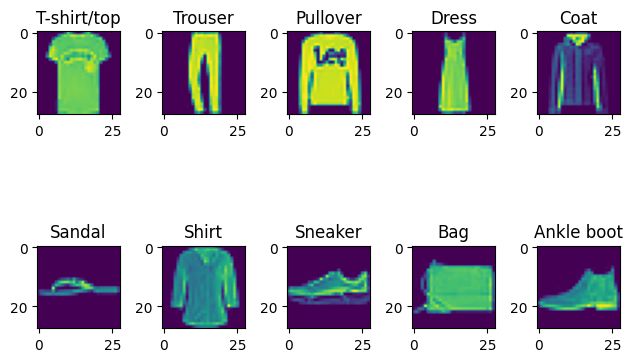

In [6]:
for i in range(10):
    plt.subplot(2,5,i+1)
    image_array = x_test[y_test==i][0]
    plt.imshow(image_array)
    plt.title(category_names_dict[i])

plt.tight_layout()    

# **Data Exploration**

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

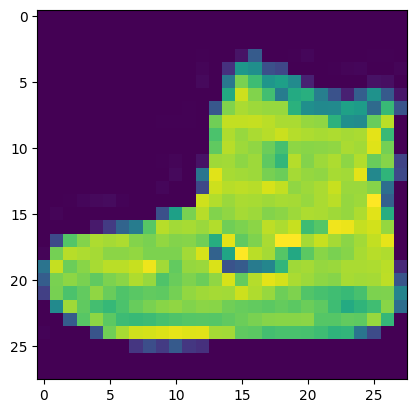

In [7]:
print(y_train[0])
print(x_train[0])
plt.imshow(x_train[0])
plt.show()

# **Data Model**

In [8]:
from keras.layers import Input, Dense, Flatten, Rescaling
from keras.models import Sequential

## **Create Model**

In [9]:
# Creat Model
Model = Sequential()
Model.add(Rescaling(1./255, input_shape=(28, 28)))
Model.add(Flatten())
Model.add(Dense(units=256, activation='relu'))
Model.add(Dense(units=128, activation='relu'))
Model.add(Dense(units=64, activation='relu'))
Model.add(Dense(units=32, activation='relu'))
Model.add(Dense(units=10, activation='sigmoid'))
# Model.summary()

# Compile Model
Model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train Model
Model.fit(x_train, y_train, epochs=5)

# Predict Test Data
y_pred = Model.predict(x_test)

# Model Evaluation
Model.evaluate(x_test, y_test) # Loss & Metrics

c:\Users\aksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7728 - loss: 0.6334
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8600 - loss: 0.3766
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8795 - loss: 0.3283
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8837 - loss: 0.3128
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8932 - loss: 0.2877
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.8792 - loss: 0.3379


[0.3334382176399231, 0.8799999952316284]

## **Visualize Model**

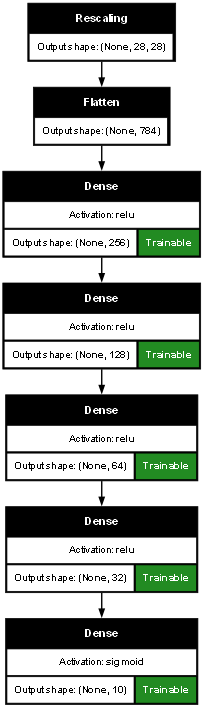

In [10]:
from IPython.display import Image

# keras.utils.plot_model(Model,to_file='Model_Architecture.png',show_shapes=True)
# Image('Model_Architecture.png')

keras.utils.plot_model(Model, show_shapes=True,show_layer_activations=True,show_trainable=True,dpi=50)

## **Visualize Predictions**

In [11]:
y_pred[:5]

array([[1.4063494e-05, 5.5305922e-04, 3.8671875e-08, 4.4951102e-04,
        2.8929226e-06, 9.5572674e-01, 1.9653369e-05, 9.8202527e-01,
        2.9821165e-02, 9.9991292e-01],
       [6.1473835e-01, 1.0303524e-03, 9.9998993e-01, 1.1124149e-01,
        9.9550861e-01, 2.8892577e-10, 9.9431527e-01, 8.9923452e-10,
        2.4021961e-02, 7.1552519e-10],
       [4.1243803e-02, 1.0000000e+00, 2.2615229e-03, 3.3617955e-01,
        4.2928848e-03, 3.5217518e-08, 4.9363114e-02, 1.3782826e-04,
        3.7410279e-04, 8.0457285e-09],
       [7.5470130e-03, 9.9999988e-01, 7.6134889e-03, 4.7091797e-01,
        2.2520060e-02, 5.5516529e-07, 5.4209877e-02, 1.2629098e-03,
        8.2614104e-04, 2.5551120e-07],
       [9.5269567e-01, 2.8815128e-02, 8.1643581e-01, 3.1742871e-01,
        4.5118964e-01, 3.5789469e-03, 9.8950619e-01, 3.5981988e-04,
        3.0440664e-01, 6.0154288e-04]], dtype=float32)

In [12]:
y_pred_labels = [np.argmax(pred) for pred in y_pred]
y_pred_labels[:5]

[9, 2, 1, 1, 6]

In [13]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [14]:
tf.math.confusion_matrix(y_test, y_pred_labels)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[760,   1,  15,  23,   3,   1, 191,   0,   6,   0],
       [  5, 965,   4,  22,   2,   0,   1,   0,   1,   0],
       [ 14,   0, 814,  12,  95,   0,  64,   0,   1,   0],
       [ 21,   6,  16, 908,  15,   0,  30,   0,   4,   0],
       [  0,   1, 117,  50, 796,   0,  35,   0,   1,   0],
       [  0,   0,   0,   1,   0, 968,   0,  15,   1,  15],
       [ 63,   0,  97,  30,  78,   0, 729,   0,   3,   0],
       [  0,   0,   0,   0,   0,  29,   0, 920,   0,  51],
       [  6,   0,   6,   2,   5,   3,   7,   3, 968,   0],
       [  0,   0,   0,   0,   0,   7,   1,  20,   0, 972]])>

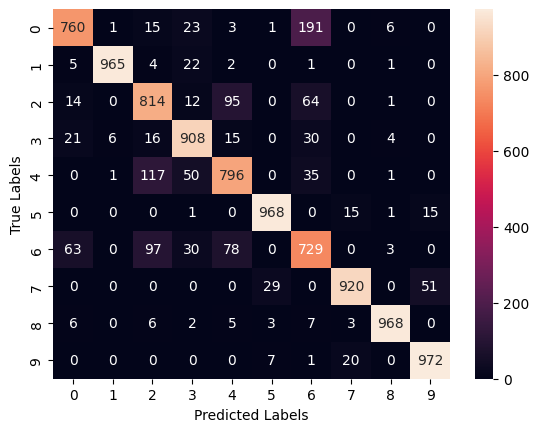

In [15]:
sns.heatmap(tf.math.confusion_matrix(y_test, y_pred_labels),annot=True,fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## **Save & Convert Model**

In [17]:
# Save Model
Model.save('Model.keras')

In [18]:
# Convert Model
tf.lite.tflite .to_tflite(model, "model.tflite")

AttributeError: module 'tensorflow._api.v2.lite' has no attribute 'convert'